## Cuarta actividad evaluativa

Profesor Alfonso Cervantes Barragán - 05-10-2020

Universidad Sergio Arboleda - Informatica III

### Descripción del contexto.

En esta actividad el estudiante debera realizar un análisis exploratorio de Datos (EDA) del dataset *housing.csv*, con datos pertenecientes a las casas encontradas en un distrito de California dado y estadísticas resumidas basadas en los datos del censo de 1990

Los datos estan organizados con la siguiente estructura:

|Columna |	Descripción |  
|--------|--------------|
|longitude	|coordenada geografica de un distrito en california |   
|latitude| coordenada geográfica de un distrito en california|   
|housing_median_age |	edad media de las viviendas | 
|total_rooms |	número total de cuartos que tienen las casas|   
|total_bedrooms |número total de dormitorios |  
|population| número total de habitantes|  
|households | número de hogares	 |  
|median_income|ingreso promedio de los habitantes | 
|medianhousevalue| valor promedio de la vivienda |  
|ocean_proximity| proximidad al oceano|






#### Entregable

El estudiante debera entregar un documento con extensión *ipynb* mediante el taller "Cuarta Evaluación " que se encuentra en el curso virtual Informatica III en el plataforma Sergio Virtual


#### Plazo

El plazo de entrega sera hasta el sabado, 24 de octubre a las 11:30 p.m. En el aula del curso en la plataforma Sergio Virtual estará disponible un taller en el cual deberan subir el archivo .ipynb (Jupyter notebook) con todo el código requerido. 

No esta permitido resolver los ejercicios a mano ni ingresar la respuesta sin que haya un código que lo respalde.

#### Donde puedo trabajar?

Este ejercicio se puede realizar en el entorno virtual creado con base en el repositorio github.com/alfonsocerv/datascience en la carpeta /ejericicio/caso5.

#### Criterios de evaluación

1. Todo el código requerido debe estar presente. Cada ejercicio debe tener su respectiva respuesta.
2. No pueden haber errores que se generen al ejecutar el código.
3. El código debe cumplir con las especificaciones de cada ejercicio.

### Ejercicio 1

Importa las librerias pandas, numpy y matplotlib

#### Respuesta

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Ejercicio 2

Leer el archivo *housing.csv* y almacenar los datos en un dataframe con nombre *data*

#### Respuesta

In [3]:
data = pd.read_csv('housing.csv')

### Ejercicio 3

Muestra las 10 primeras filas del dataframe *data*

#### Respuesta

In [4]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## ANALISIS EXPLORATORIO DE DATOS (EDA)

### Ejercicio 4
¿Cuántos registros tiene la base de datos? 

#### Respuesta

In [5]:
print('El número de registros que tiene esta base de datos es %i.' % data.shape[0])

El número de registros que tiene esta base de datos es 20640.


### Ejercicio 5

¿Cual es el mayor valor promedio de las viviendas con mayor edad media?

#### Respuesta

In [6]:
max_hma = data['housing_median_age'].max()
print('Mayor edad media de las viviendas: %f' % max_hma)

data_max_hma = data[ max_hma == data['housing_median_age'] ]
res = data_max_hma['median_house_value'].max()
print('El mayor valor promedio de las viviendas con edad media igual a %f es: %f' % (max_hma, res))

Mayor edad media de las viviendas: 52.000000
El mayor valor promedio de las viviendas con edad media igual a 52.000000 es: 500001.000000


### Ejercicio 6

¿Cuántos sectores de casas tienen el menor ingreso promedio de los habitantes?

#### Respuesta

In [7]:
min = data['median_income'].min()
num = data[ min == data['median_income'] ].shape[0]
print('El número de sectores donde los habitantes tiene el menor ingreso promedio es: %i' % num)

El número de sectores donde los habitantes tiene el menor ingreso promedio es: 12


### Ejercicio 7

¿Cuál es el sector encuestado más poblado? Muestra el registro con todas las columnas.

#### Respuesta

In [8]:
data[data['population'].max() == data['population']].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN


### Ejercicio 8

Calcule las medidas de tendencia central del número de hogares.

#### Respuesta

In [9]:
print('Media: %f' % data['households'].mean())
print('Mediana: %f' % data['households'].median())
print('Moda: %f' % data['households'].mode())

Media: 499.539680
Mediana: 409.000000
Moda: 306.000000


### Ejercicio 9

Hallar el promedio de dormitorios y habitantes en los bloques o sectores de los distritos de California, además calcular un estimado del número de personas por dormitorio.

#### Respuesta

In [10]:
res = data[['total_bedrooms', 'population']].mean()
print('El promedio de dormitorios es %f' % res[0])
print('El promedio de habitantes es %f' % res[1])

estimado = res[1] / res[0]
print('\nEstimado de personas por dormitorio sin aproximar: %f' % estimado)
print('El estimado de personas por dormitorio está entre %i y %i.' 
      % (np.floor(estimado), np.ceil(estimado)))

El promedio de dormitorios es 537.870553
El promedio de habitantes es 1425.476744

Estimado de personas por dormitorio sin aproximar: 2.650223
El estimado de personas por dormitorio está entre 2 y 3.


### Ejercicio 10

Mostrar un diagrama de barras de la proximidad al oceano de las casas registradas dentro de la base de datos.

#### Respuesta

Frecuencias de cada proximidad al oceano:
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64



<AxesSubplot:>

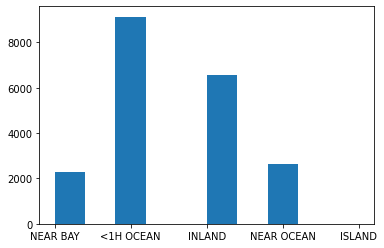

In [11]:
print('Frecuencias de cada proximidad al oceano:')
print(data['ocean_proximity'].value_counts())
print()
data['ocean_proximity'].hist(grid=False)

Se puede observar que la mayoría de las casas encuestadas se encuentran a menos de 1 hora del oceano (<*1H OCEAN*).

Observando el histograma se puede notar que la categoría de proximidad al oceano con menor frecuencia es *ISLAND* teniendo solo 5 registros, también nos podemos dar cuenta que esta frecuencia es mucho menor comparada con los demás niveles de proximidad que están por encima de los 2000 registros.



### Ejercicio 11

Analice el comportamiento del ingreso medio a través de un histograma y de apreciaciones sobre lo que observa.

#### Respuesta

<AxesSubplot:>

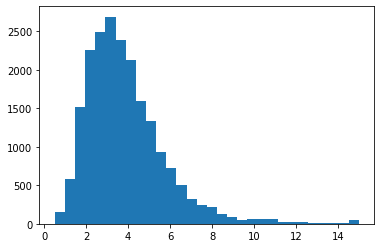

In [12]:
data['median_income'].hist(bins=30, grid=False)

Al realizar el histograma de el ingreso medio de los habitantes, se puede apreciar que:

- Tiene una curva muy apuntada
- Tiene asimetría positiva

### Ejercicio 12

Compruebe lo dicho anteriormente hallando el indice de asimetría y la curtosis del conjunto de datos correspondiente al ingreso medio.

#### Respuesta

In [13]:
skew = data['median_income'].skew()
print('El índice de asimetría es: %f' % skew)
if skew > 0:
    print('Asimetría positiva\n')
elif skew == 0:
    print('Gráfica simétrica')
else:
    print('Asimetría negativa')

kurt = data['median_income'].kurtosis()
print('\nEl índice de asimetría es: %f' % kurt)
if kurt > 0:
    print('Curva Leptocúrtica\n')
elif kurt == 0:
    print('Curva Mesocúrtica (distribución normal)')
else:
    print('Curva Platicúrtica')

El índice de asimetría es: 1.646657
Asimetría positiva


El índice de asimetría es: 4.952524
Curva Leptocúrtica



### Ejercicio 13

¿El precio de las casas se ve afectado por la proximidad al oceano en los distritos de California?
#### Respuesta

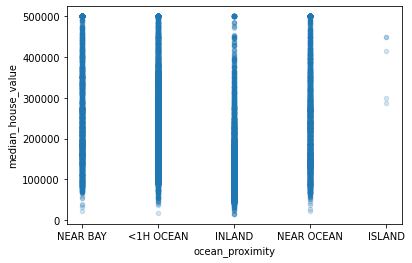

In [14]:
data.plot.scatter(x='ocean_proximity', y='median_house_value', alpha = 0.2);

La proximidad al oceano no es determinante en el precio medio de las casas de los distritos de California. Para cualquier nivel de proximidad al oceano los precios de las casas pueden ser desde los más bajos hasta los más altos, o sea que estos precios varían uniformemente como se observa en el gráfico.

### Ejercicio 14

Mostrar el número de habitantes, número de hogares, ingreso medio de los habitantes y precio medio de la vivienda de los 10 primeros sectores con mayor precio medio de vivienda.

#### Respuesta


In [15]:
data[['population', 'households', 'median_income', 'median_house_value']].sort_values(['median_house_value'], ascending=False).head(10)

,population,households,median_income,median_house_value
10667,772.0,304.0,10.1275,500001.0
16916,967.0,374.0,7.0422,500001.0
16946,827.0,319.0,6.1349,500001.0
8877,859.0,306.0,8.0257,500001.0
8878,1143.0,375.0,15.0001,500001.0
8879,769.0,277.0,8.3839,500001.0
16941,843.0,324.0,6.9533,500001.0
16940,870.0,309.0,9.3694,500001.0
16939,1050.0,410.0,4.6406,500001.0
16938,644.0,251.0,10.0743,500001.0


### Ejercicio 15

¿Existe una relación entre el número total de dormitorios y el número de hogares?
Para responder esta pregunta elabore un diagrama de dispersión con base en estas dos variables.

#### Respuesta

<AxesSubplot:xlabel='households', ylabel='total_bedrooms'>

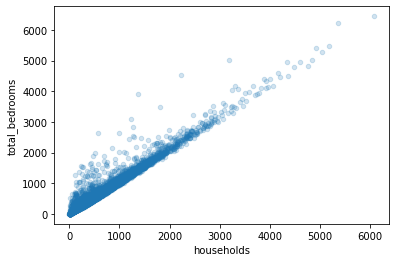

In [16]:
data.plot.scatter(x='households', y='total_bedrooms', alpha = 0.2)

En el diagrama de dispersión se observa una correlación positiva (a medida que aumenta el número de hogares, aumenta también el número de dormitorios) puesto que los valores siguen una línea de tendencia. Entonces sí existe una alta relación entre estas dos variables.